# Entanglement-Assisted Communication Value for Axisymmetric Channels 

In this notebook, we explore the entanglement-assisted communication value for axisymmetric channels.
These channels are constructed from the axisymmetric states described in https://arxiv.org/pdf/1505.01833.pdf.
They are important to investigate because all PPT state are also separable meaning that `pptCVPrimal` computes the exact communication value.
The entanglement-assisted communication value is bounded as

$$
    CV_{ea}(\mathcal{N}) \leq d_b CV(\mathcal{N}),
$$

where $\mathcal{N}$ is the axisymmetric channel and $d_b$ is the Hilbert space dimension of the output of $\mathcal{N}$. Here, we plot the difference

$$
CV_{ea}(\mathcal{N}) - d_b CV(\mathcal{N})
$$

over the entire axisymmetric parameter space to identify the parameters at which the bound is achieved and where large separations occur.

In [1]:
using CVChannel
using Plots

In [2]:
"""
This function scans over the parameter space for axisymmetric channels
and computes the communication value for each axisymmetric channel.
Two parameters, x and y, are scanned with their respective number of
samples across the domain of the axisymmetric states.

The returned data is arranged to be plotted as a contour plot.
"""
function scan_axisymmetric_cv(d, x_samples, y_samples)
    x_bound = CVChannel._axisymmetric_x_bounds(d)
    y_bound = CVChannel._axisymmetric_y_bounds(d)

    x_step = (x_bound[2]-x_bound[1])/x_samples
    y_step = (y_bound[2]-y_bound[1])/y_samples

    x_range = x_bound[1]:x_step:x_bound[2]
    y_range = y_bound[1]:y_step:y_bound[2]

    ea_cvs = zeros(Float64, length(y_range), length(x_range))
    ppt_cvs = zeros(Float64, length(y_range), length(x_range))

    for y_id in 1:length(y_range)

        y = y_range[y_id]

        x_constraints = CVChannel._axisymmetric_x_constraints(d,y)

        xid_lower = findfirst(x_id -> x_range[x_id] ≥ x_constraints[1], 1:length(x_range))
        xid_upper = findlast(x_id -> x_range[x_id] ≤ x_constraints[2], 1:length(x_range))

        for x_id in xid_lower:xid_upper

            x = x_range[x_id]

            ρ_axi = axisymmetricState(d,x,y)

            J_N = d * ρ_axi
            (ea_cv_N, ea_σAB_N) = eaCVDual(J_N, d, d)
            (ppt_cv_N, ppt_σAB_N) = pptCVDual(J_N, d, d)

            ea_cvs[y_id,x_id] = ea_cv_N 
            ppt_cvs[y_id,x_id] = ppt_cv_N
        end
    end
    
    diff = ea_cvs - d * ppt_cvs
    return (x_range, y_range, diff)
end;

## d = 2

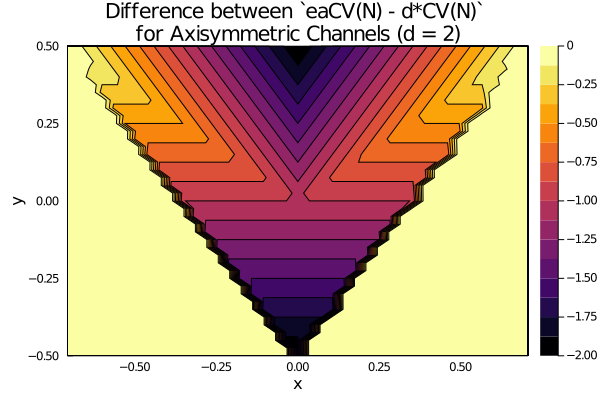

In [3]:
d = 2
x_range, y_range, cvs = scan_axisymmetric_cv(d,40,40)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Difference between `eaCV(N) - d*CV(N)` \nfor Axisymmetric Channels (d = $d)",
)

## d= 3

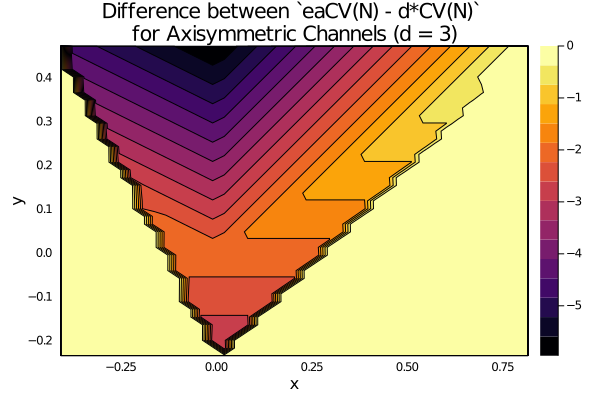

In [4]:
d = 3
x_range, y_range, cvs = scan_axisymmetric_cv(d,40,40)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Difference between `eaCV(N) - d*CV(N)` \nfor Axisymmetric Channels (d = $d)",
)

## d = 4

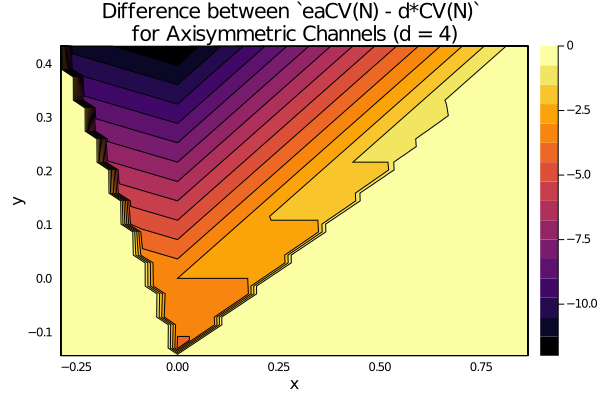

In [5]:
d = 4
x_range, y_range, cvs = scan_axisymmetric_cv(d,40,40)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Difference between `eaCV(N) - d*CV(N)` \nfor Axisymmetric Channels (d = $d)",
)

## d = 5

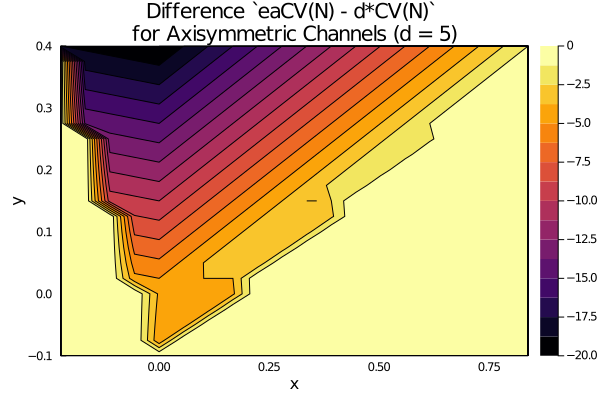

In [6]:
d = 5
x_range, y_range, cvs = scan_axisymmetric_cv(d,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Difference `eaCV(N) - d*CV(N)` \nfor Axisymmetric Channels (d = $d)",
)

## d = 6

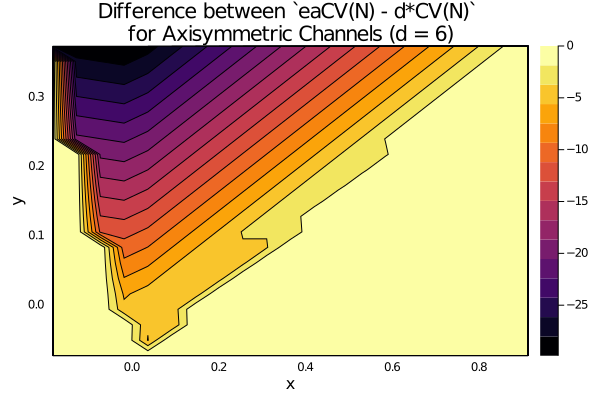

In [7]:
d = 6
x_range, y_range, cvs = scan_axisymmetric_cv(d,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Difference between `eaCV(N) - d*CV(N)` \nfor Axisymmetric Channels (d = $d)",
)

## d = 7

In [ ]:
d = 7
@time x_range, y_range, cvs = scan_axisymmetric_cv(d,20,20)
contour(x_range,y_range,cvs,
    fill=true,
    xlabel="x",
    ylabel="y",
    title="Difference between `eaCV(N) - d*CV(N)` \nfor Axisymmetric Channels (d = $d)",
)